In [30]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
X

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [35]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20, random_state=1)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Dokładność testu: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Dokładność testu: 0.947


In [52]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('Podzbiór: %s, Rozkład klasy: %s, Dokładność: %.3f' % (k+1, np.bincount(y_train[train]), score))
    
print('\nDokładność sprawdzianu: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
scores=[]
scores = cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=1)
print('\nDokładność sprawdzianu: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Podzbiór: 1, Rozkład klasy: [256 153], Dokładność: 0.891
Podzbiór: 2, Rozkład klasy: [256 153], Dokładność: 0.978
Podzbiór: 3, Rozkład klasy: [256 153], Dokładność: 0.978
Podzbiór: 4, Rozkład klasy: [256 153], Dokładność: 0.913
Podzbiór: 5, Rozkład klasy: [256 153], Dokładność: 0.935
Podzbiór: 6, Rozkład klasy: [257 153], Dokładność: 0.978
Podzbiór: 7, Rozkład klasy: [257 153], Dokładność: 0.933
Podzbiór: 8, Rozkład klasy: [257 153], Dokładność: 0.956
Podzbiór: 9, Rozkład klasy: [257 153], Dokładność: 0.978
Podzbiór: 10, Rozkład klasy: [257 153], Dokładność: 0.956

Dokładność sprawdzianu: 0.950 +/- 0.029

Dokładność sprawdzianu: 0.950 +/- 0.029


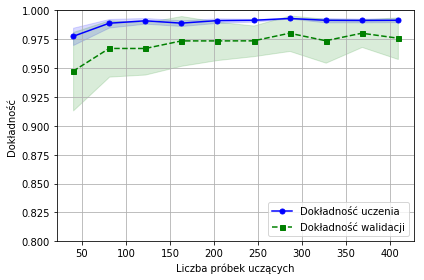

In [62]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = Pipeline([('scl',StandardScaler()),('clf', LogisticRegression(penalty='l2',random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1,1.0,10),
                                                        cv=10,
                                                        n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Dokładność uczenia')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Dokładność walidacji')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Liczba próbek uczących')
plt.ylabel('Dokładność')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
#plt.savefig('./rysunki/06_05.png', dpi=300)
plt.show()

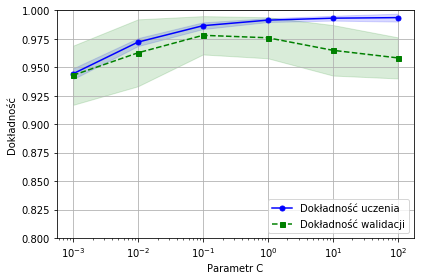

In [65]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='clf__C',param_range=param_range,cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Dokładność uczenia')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Dokładność walidacji')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parametr C')
plt.ylabel('Dokładność')
plt.ylim([0.8, 1.0])
plt.tight_layout()
#plt.savefig('./rysunki/06_06.png', dpi=300)
plt.show()

In [77]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
pipe_svc = Pipeline([('scl',StandardScaler()),('clf', SVC(random_state=1))])
param_range = [0.001, 0.01,0.1,1,10,100,1000]
param_grid = [{'clf__C': param_range,
              'clf__kernel':['linear']},
              {'clf__C':param_range,
               'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs = -1)
gs = gs.fit(X_train,y_train)
print(gs.best_params_)

{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [78]:
clf = gs.best_estimator_
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.964912280702


In [80]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs = -1)
scores = cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=5)
np.mean(scores)

0.96043956043956036

In [83]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confmat

array([[71,  1],
       [ 2, 40]], dtype=int64)

In [87]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print(precision_score(y_true=y_test, y_pred=y_pred))
print(recall_score(y_true=y_test, y_pred=y_pred))
print(f1_score(y_true=y_test, y_pred=y_pred))

0.975609756098
0.952380952381
0.963855421687
